**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace
import math
from sympy import N, lambdify

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import ipywidgets as widgets

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# a. Setting parameters 
L = sm.symbols('L') 
kappa = sm.symbols('kappa')
nu = sm.symbols('nu')
w = sm.symbols('w_t')
G = sm.symbols('G')
alpha = sm.symbols('alpha')
tau = sm.symbols('tau')
w_bar = sm.symbols('w')

# b. Writing up profits 
consumption = kappa+w_bar*L

# c. Inserting consumption 
Utility = sm.ln(consumption**alpha*G**(1-alpha))-nu*(L**2/2)

# d. Taking first order conditions wrt. L
FOC = sm.diff(Utility, L)

# e. Isolating for L
sol = sm.solve(FOC, L)

sol_L = sm.Eq(L, sol[1])
sol_L

Eq(L, (-kappa*nu + sqrt(nu*(4*alpha*w**2 + kappa**2*nu)))/(2*nu*w))

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

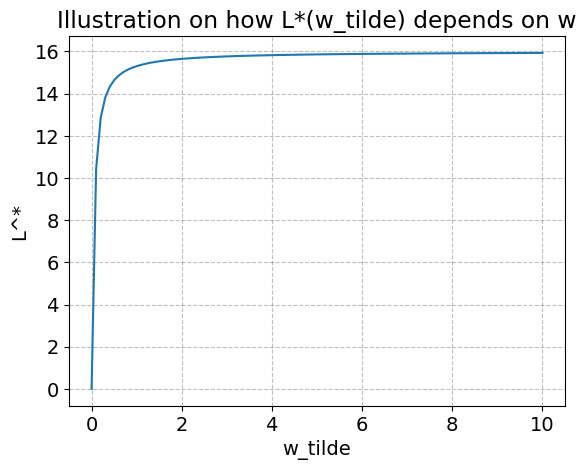

In [3]:
parameters = {
kappa: 1.0,
alpha: 0.5,
tau: 0.3,
nu: 1/(2*(16**2)),
w: 1,
w_bar: (1-0.3)*1
}

sol_L = sol_L.subs(w_bar, (1-tau)*w)

w_values = np.linspace(1e-8, 10, 100)

l_values = [N(sol_L.subs({**parameters, w: w}).rhs.evalf())]

l_fun = lambdify(w, l_values, modules=['numpy'])

l_values = [l_fun(w_value) for w_value in w_values]

plt.plot(w_values, l_values)
plt.xlabel('w_tilde')
plt.ylabel('L^*')
plt.title('Illustration on how L*(w_tilde) depends on w')
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [4]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [5]:
test = (-kappa + sm.sqrt(kappa**2 + 4 * alpha/nu * w_bar**2)) / (2 * w_bar)

# a. Defining government consumption
G4 = tau*w*test*((1-tau)*w)

# b. Inserting government consumption and consumption 
V4 = sm.log(consumption**alpha*G4**(1-alpha))-nu*(L**2/2)

# c. Finding FOC wrt. tau 
FOC4 = sm.diff(V4, tau)

# d. Solving the model for optimal tax rate
sol4 = sm.solve(FOC4, tau)
sol_tau = sm.Eq(tau, sol4[0])

print('The optimal tax rate is:')
display(sol_tau)


The optimal tax rate is:


Eq(tau, 1/2)

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [6]:
# a. Setting new parameters 
sigma = sm.symbols('sigma') 
rho = sm.symbols('rho')

# a. Defining optimal tau 
tau_val = sol4[0]

# b. 
V5 = (((alpha*consumption**((sigma-1)/sigma)+(1-alpha)*G4**((sigma-1)/sigma))**(sigma/(sigma-1))**(1-rho))-1)/(1-rho)-nu

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [8]:
# a. Setting parameters 
l = sm.symbols('l') 
eta = sm.symbols('eta')
kappa = sm.symbols('kappa')
w = sm.symbols('w')

# b. Writing up profits 
profits = kappa*l**(1-eta)-w*l

# c. Taking first order conditions wrt. l 
foc = sm.diff(profits, l)

# d. Isolating for l_t
sol = sm.solve(sm.Eq(foc,0), l)
sol[0]

(kappa*(1 - eta)/w)**(1/eta)

We have now shown that $l_t$ maximizes profits for $\kappa\in\left\{1.0 , 2.0\right\}$

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [9]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [10]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [11]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [12]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [13]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

We start of by drawing many random starting values. We set the seed to 2023 so we are able to replicate our results.

In [14]:
# Step A: Drawing random x^k uniformly within chosen bounds
np.random.seed(2023)
K_warmup = 10
K = 1000

x0s = -600 + 1200*np.random.uniform(size=(K,2)) # drawing from -600 to +600
xs = np.empty((K,2))
fs = np.empty(K)

In [15]:
# Step B: Showing k
print(f'min(x0s) = {np.min(x0s):.2f}, max(x0s) = {np.max(x0s):.2f}')

min(x0s) = -599.08, max(x0s) = 599.86


We now run the optimizer using BFGS method with $x^{k0}$ as initial guess and $x^{k*}$ as result.

In [16]:
# Defining step C
def stepC(k,K_warmup):
    Xk = 0.5 * 2/(1+np.exp((k-K_warmup)/100))
    return Xk

# Defining step D
def stepD(xk,chi_k,xopt):
    xk0 = chi_k*xk + (1-chi_k)*xopt
    return xk0

In [17]:
fopt = np.inf
xopt = np.nan

# Creating empty list so we are able to save the results from the warm-up iterations
k_res = []
x0_res = []
con_res = []

# Creating a loop
for i,x0 in enumerate(x0s):
    
    # Checking step B, C and D
    if i < K_warmup: # Step B
        x_k0 = x0
    elif i > K_warmup or i==K_warmup: # Step C + D
        X_k = stepC(i,K_warmup)
        x_k0 = stepD(X_k,x0,xopt)

    # Adding the results to our empty lists
    k_res.append(i)
    x0_res.append(x0s)

    # Optimizing
    result = optimize.minimize(griewank,x_k0,method='BFGS',tol=1e-8)
    xs[i,:] = result.x
    f = result.fun
    
    # Adding result
    con_res.append(result.fun)

    # Printing the first 10 or if improving
    if i < 10 or f < fopt:
        if f < fopt:
            fopt = f
            xopt = xs[i,:]
        
        # Printing the results
        print(f'{i:4d}: x0 = ({x0[0]:7.2f},{x0[1]:7.2f})',end='')
        print(f' -> converged at ({xs[i][0]:7.2f},{xs[i][1]:7.2f}) with f = {f:12.8f}')

# Printing the best solution
print(f'\nbest solution:\n x = ({xopt[0]:7.2f},{xopt[1]:7.2f}) -> f = {fopt:12.8f}')

   0: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   1: x0 = ( 105.66,-448.08) -> converged at ( 103.62,-448.27) with f =  52.97477721
   2: x0 = (-430.39, -38.53) -> converged at (-430.18, -39.95) with f =  46.68672712
   3: x0 = (-573.49, 272.73) -> converged at (-574.61, 270.73) with f = 100.93237534
   4: x0 = (  29.26,  53.92) -> converged at (  31.40,  53.26) with f =   0.95651824
   5: x0 = ( -52.35,   1.66) -> converged at ( -50.24,  -0.00) with f =   0.63133900
   6: x0 = (-126.64,-418.59) -> converged at (-125.60,-417.21) with f =  47.50580373
   7: x0 = (-166.95,-405.51) -> converged at (-166.42,-403.89) with f =  47.75130112
   8: x0 = (-194.45,-383.61) -> converged at (-194.68,-381.70) with f =  45.94087168
   9: x0 = (-130.81,-557.22) -> converged at (-128.74,-554.79) with f =  81.17366573
  38: x0 = (-577.99, 124.14) -> converged at ( -18.84, -35.51) with f =   0.40429385
  83: x0 = ( -69.34,-134.42) -> converged at (  -3.14,  22.19) wi

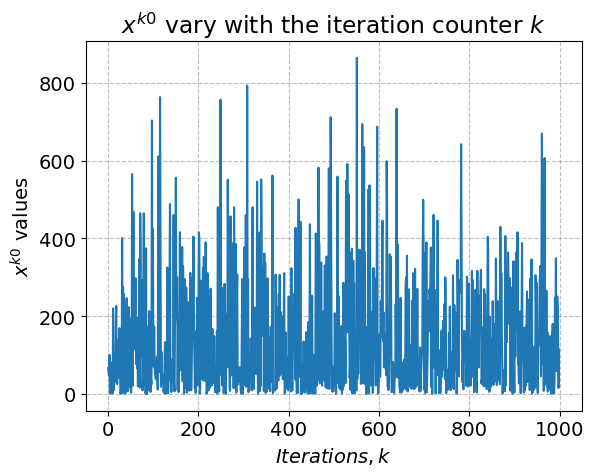

In [18]:
plt.plot(con_res)
plt.title('$x^{k0}$ vary with the iteration counter $k$')
plt.xlabel('$Iterations, k$')
plt.ylabel('$x^{k0}$ values')
plt.show()

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [19]:
np.random.seed(2023)
K_warmup_new = 100 # Setting a new number of warm-up iterations
K = 1000

x0s = -600 + 1200*np.random.uniform(size=(K,2))
xs = np.empty((K,2))
fs = np.empty(K)

In [20]:
def stepC(k,K_warmup_new):
    Xk = 0.5 * 2/(1+np.exp((k-K_warmup_new)/100))
    return Xk

def stepD(xk,chi_k,xopt):
    xk0 = chi_k*xk + (1-chi_k)*xopt
    return xk0

In [21]:
fopt = np.inf
xopt = np.nan

k_res_new = []
x0_res_new = []
con_res_new = []

# Creating a loop
for i,x0 in enumerate(x0s):
    
    # Checking step B, C and D
    if i < K_warmup_new: # Step B
        x_k0 = x0
    elif i > K_warmup_new or i==K_warmup_new: # Step C + D
        X_k = stepC(i,K_warmup_new)
        x_k0 = stepD(X_k,x0,xopt)

    # Adding the results to our empty lists
    k_res.append(i)
    x0_res.append(x0s)

    # Optimizing
    result = optimize.minimize(griewank,x_k0,method='BFGS',tol=1e-8)
    xs[i,:] = result.x
    f = result.fun
    
    # Adding result
    con_res.append(result.fun)

    # Printing the first 10 or if improving
    if i < 10 or f < fopt:
        if f < fopt:
            fopt = f
            xopt = xs[i,:]
        
        # Printing the results
        print(f'{i:4d}: x0 = ({x0[0]:7.2f},{x0[1]:7.2f})',end='')
        print(f' -> converged at ({xs[i][0]:7.2f},{xs[i][1]:7.2f}) with f = {f:12.8f}')

# Printing the best solution
print(f'\nbest solution:\n x = ({xopt[0]:7.2f},{xopt[1]:7.2f}) -> f = {fopt:12.8f}')

   0: x0 = (-213.61, 468.51) -> converged at (-213.51, 470.46) with f =  66.79472511
   1: x0 = ( 105.66,-448.08) -> converged at ( 103.62,-448.27) with f =  52.97477721
   2: x0 = (-430.39, -38.53) -> converged at (-430.18, -39.95) with f =  46.68672712
   3: x0 = (-573.49, 272.73) -> converged at (-574.61, 270.73) with f = 100.93237534
   4: x0 = (  29.26,  53.92) -> converged at (  31.40,  53.26) with f =   0.95651824
   5: x0 = ( -52.35,   1.66) -> converged at ( -50.24,  -0.00) with f =   0.63133900
   6: x0 = (-126.64,-418.59) -> converged at (-125.60,-417.21) with f =  47.50580373
   7: x0 = (-166.95,-405.51) -> converged at (-166.42,-403.89) with f =  47.75130112
   8: x0 = (-194.45,-383.61) -> converged at (-194.68,-381.70) with f =  45.94087168
   9: x0 = (-130.81,-557.22) -> converged at (-128.74,-554.79) with f =  81.17366573
  33: x0 = ( -19.67,  18.27) -> converged at ( -18.84,  17.75) with f =   0.16766000
 890: x0 = (-166.71,  75.79) -> converged at (  12.56, -17.75) wi